# Activation and Loss Function Exploration Exercise

## Background
This exercise aims to explore the effects of different activation and loss functions on a neural network's learning and performance. You will modify a simple neural network in TensorFlow to experiment with these functions.

## Activation Functions
Common activation functions include:

* Sigmoid
* ReLU (Rectified Linear Unit)
* Tanh (Hyperbolic Tangent)

## Loss Functions
Some standard loss functions are:

* Mean Squared Error (MSE) - typically used for regression tasks
* Binary Cross-Entropy - used for binary classification
* Categorical Cross-Entropy - used for multi-class classification

# Setup
First, let's import TensorFlow and other necessary libraries. Run the cell below to import them.


In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


## Dataset Preparation
We'll use a synthetic dataset for binary classification. The 'make_moons' function from scikit-learn generates a two-moon dataset, which is ideal for this experiment.

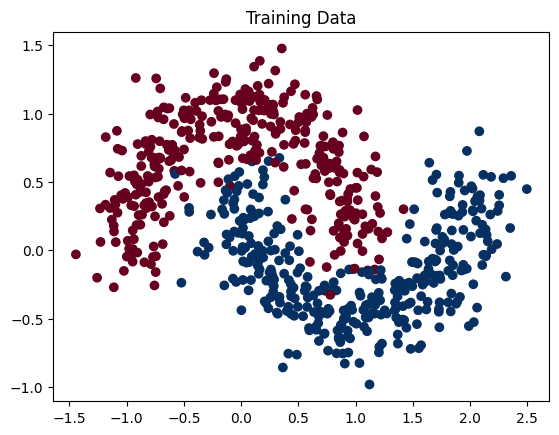

In [37]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()


## Model Building
Now, let's define a function to create a simple neural network model. You will modify this function later to experiment with different activation and loss functions.

In [38]:
def build_model(activation_function='relu', loss_function='binary_crossentropy'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation=activation_function, input_shape=(2,)), # input and 1st hidden layer defined on same row, 2 nodes (x, y in data)
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model


# Training and evaluating the model
Let's train the model and see how well it solves the problem.

In [39]:
# history is an object containing among others history.history dict with keys (['loss', 'accuracy', 'val_loss', 'val_accuracy'] where 'loss' is training loss and 'accuracy' is training accuracy
# loss always and additioinal keys depending on chosen metrics
# example history.history from 3 epoches:
# {'loss': [0.6783459186553955, 0.655145525932312, 0.6337840557098389], 'accuracy': [0.5767857432365417, 0.7982142567634583, 0.8357142806053162], 'val_loss': [0.6682615280151367, 0.6453961730003357, 0.6236783266067505], 'val_accuracy': [0.6714285612106323, 0.8571428656578064, 0.8214285969734192]}

10/10 [==============================] - 0s 3ms/step


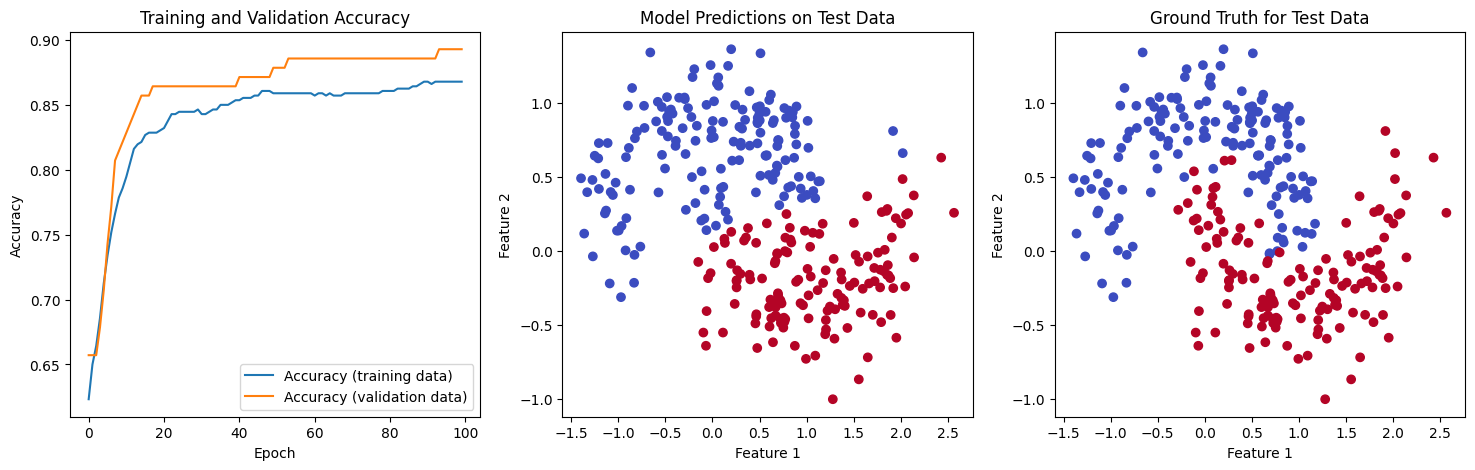

Test Loss: 0.2432
Test Accuracy: 0.8967


(0.24316106736660004, 0.8966666460037231)

In [40]:
# Function to train, evaluate, and visualize model predictions along with ground truth
def train_and_evaluate_model(model, epochs=100):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2) # prints validation batches

    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Plotting training history
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    # Predicting on test data
    predictions = model.predict(X_test) > 0.5 # 0.5 since binary problem (model.predict(X_test) gives [0.6682471 ][0.48421928][0.661438  ][...]...)

    # Plotting model predictions
    plt.subplot(1, 3, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
    plt.title('Model Predictions on Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plotting ground truth
    plt.subplot(1, 3, 3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.title('Ground Truth for Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.show()

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return test_loss, test_accuracy

# Example of using the function with a specific activation and loss function
model = build_model(activation_function='relu', loss_function='binary_crossentropy')
train_and_evaluate_model(model, epochs=100)


# Experimentation
## Task 1: Activation Functions
1. Experiment with different activation functions in the hidden layer. Replace activation_function in build_model with 'sigmoid', 'relu', and 'tanh'.
2. Train the model for each activation function and evaluate its performance on the test set.
3. Record your observations.
## Task 2: Loss Functions
1. Now, experiment with different loss functions. For binary classification, try 'binary_crossentropy' and 'mean_squared_error'.
2. Train and evaluate the model for each loss function.
3. Record your observations.

# Analysis and Questions
After completing the tasks, answer the following questions:

1. How did different activation functions affect the model's performance?
    * ReLU best - Tanh middle - sigmoid worst
2. How did different loss functions impact the learning process and accuracy?
    * MSE better
3. Which combination of activation and loss function provided the best results for this task?
    * ReLU and MSE

10/10 [==============================] - 0s 3ms/step


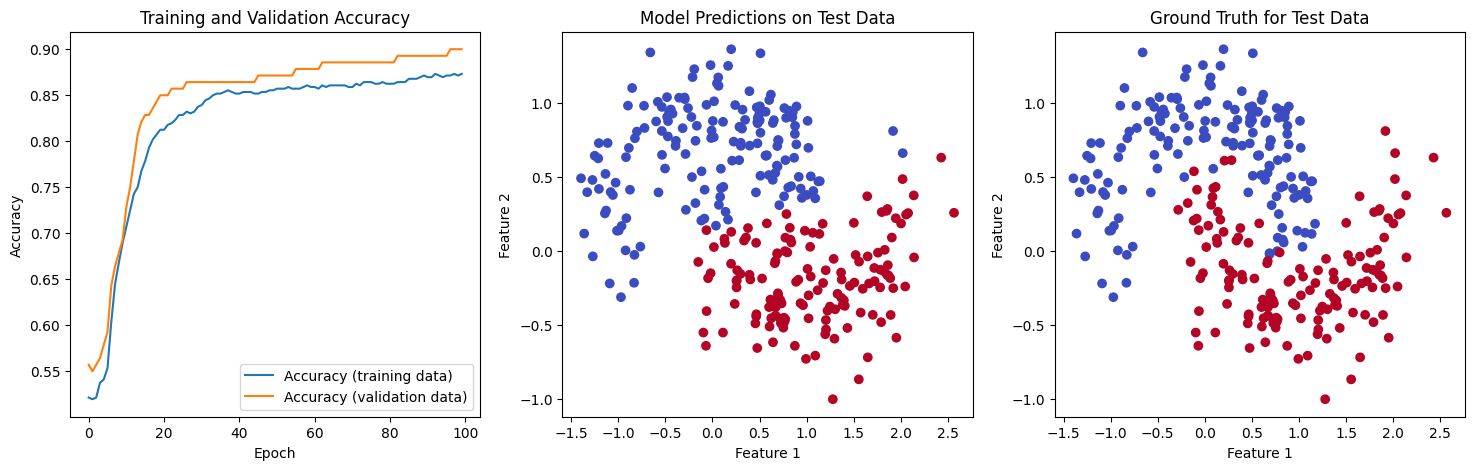

Test Loss: 0.2336
Test Accuracy: 0.9000
relu, binary_crossentropy: Test Loss = 0.2336, Test Accuracy = 0.9000
10/10 [==============================] - 0s 3ms/step


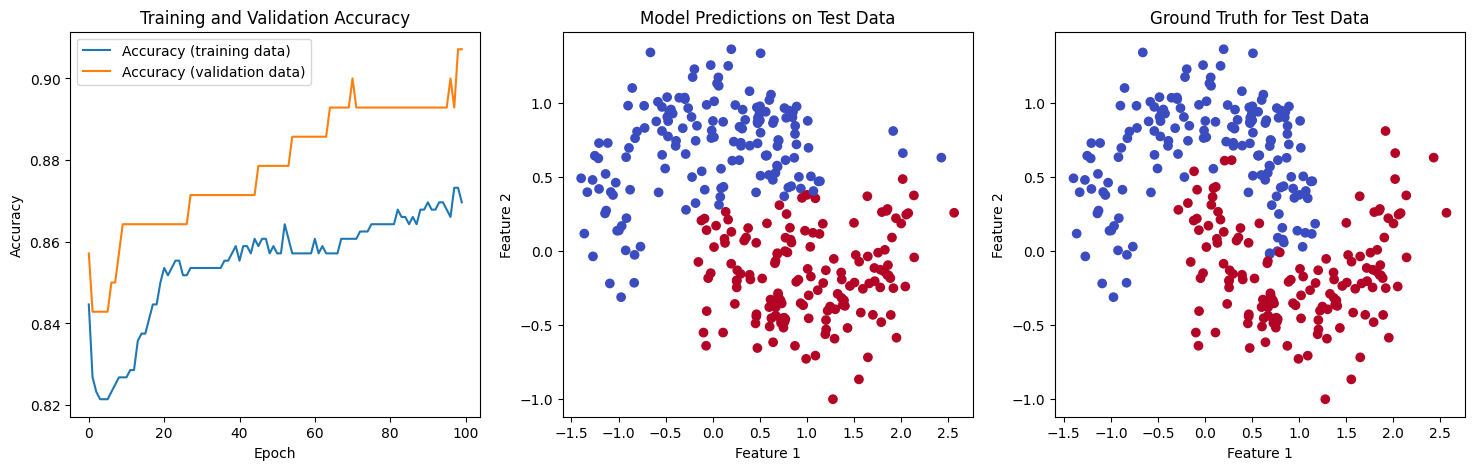

Test Loss: 0.0729
Test Accuracy: 0.9000
relu, mean_squared_error: Test Loss = 0.0729, Test Accuracy = 0.9000
10/10 [==============================] - 0s 3ms/step


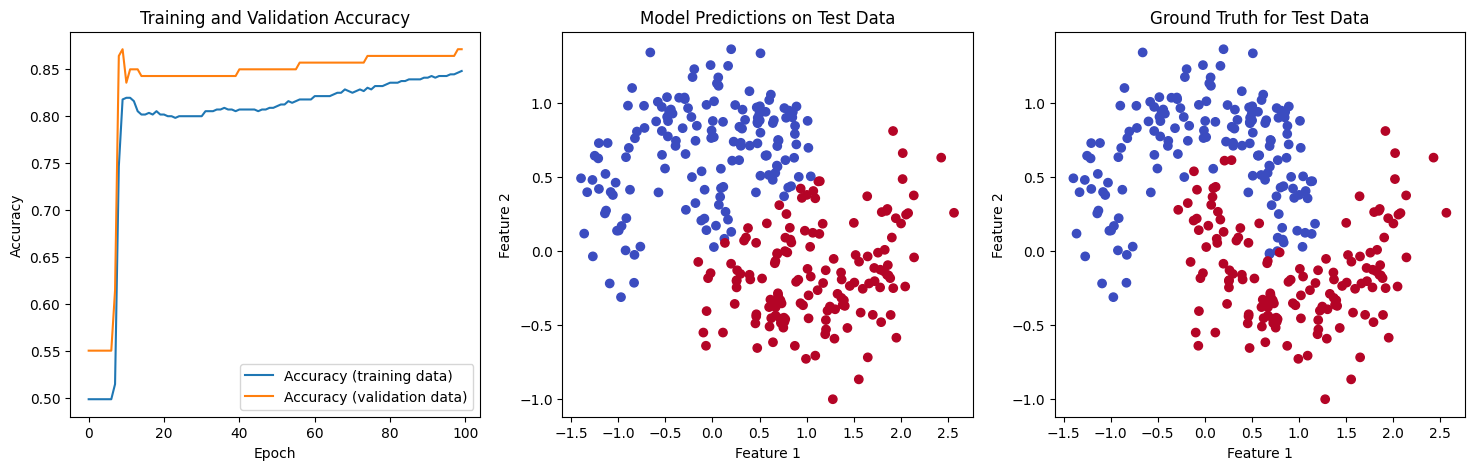

Test Loss: 0.3037
Test Accuracy: 0.8667
sigmoid, binary_crossentropy: Test Loss = 0.3037, Test Accuracy = 0.8667
10/10 [==============================] - 0s 3ms/step


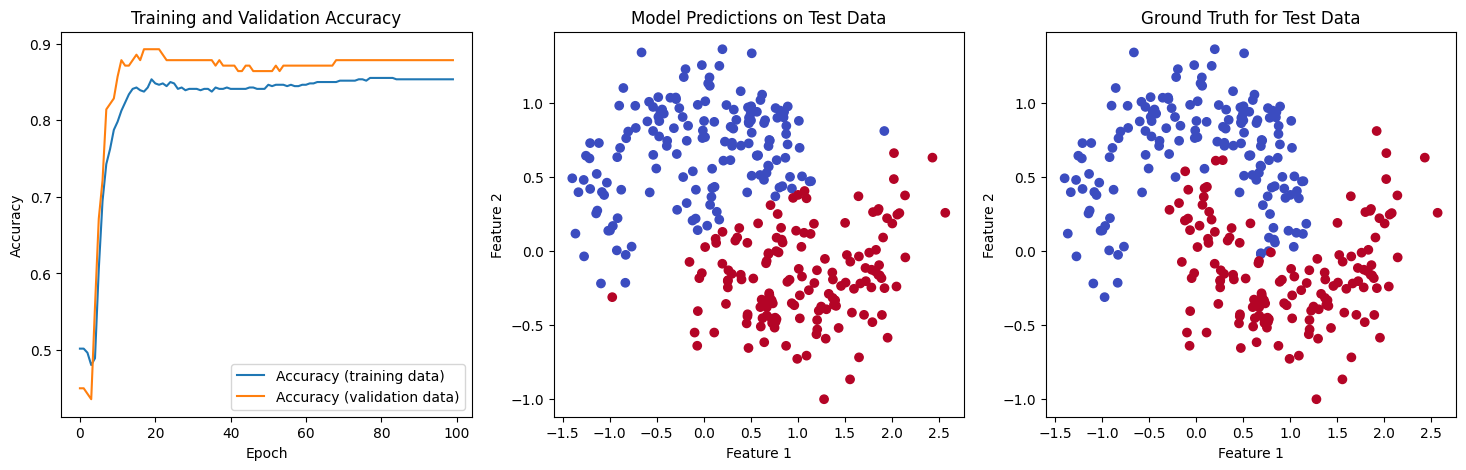

Test Loss: 0.0896
Test Accuracy: 0.8800
sigmoid, mean_squared_error: Test Loss = 0.0896, Test Accuracy = 0.8800
10/10 [==============================] - 0s 3ms/step


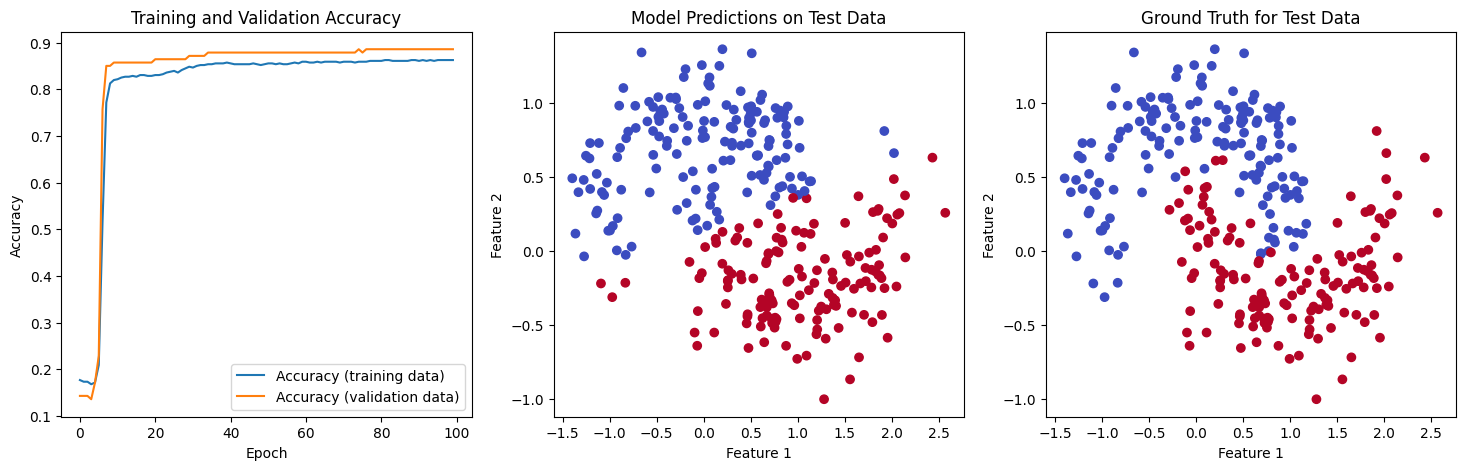

Test Loss: 0.2689
Test Accuracy: 0.8800
tanh, binary_crossentropy: Test Loss = 0.2689, Test Accuracy = 0.8800
10/10 [==============================] - 0s 3ms/step


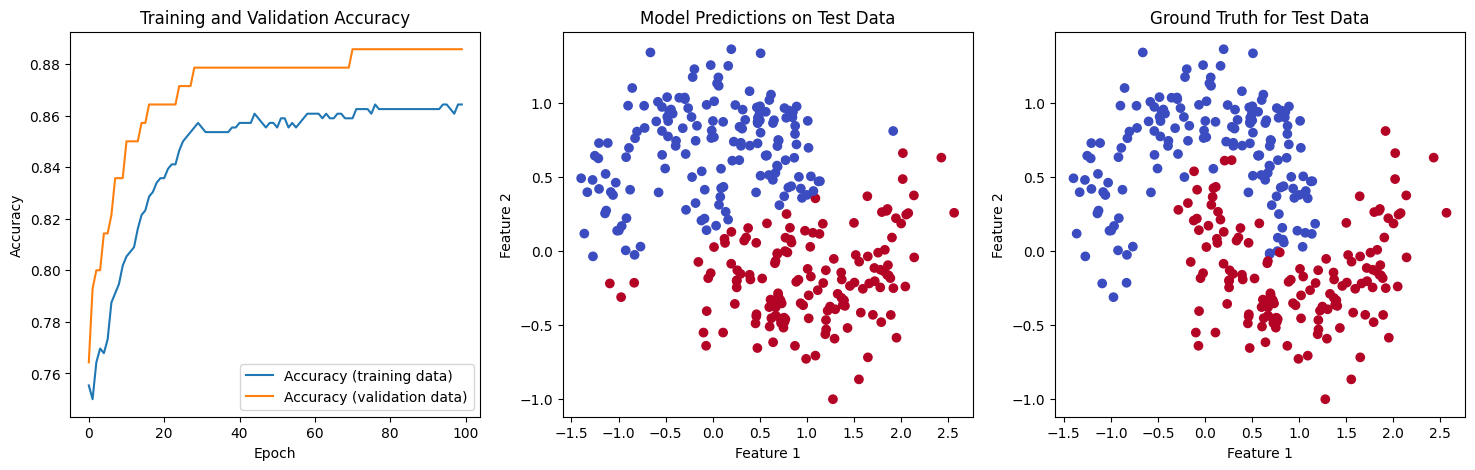

Test Loss: 0.0819
Test Accuracy: 0.8867
tanh, mean_squared_error: Test Loss = 0.0819, Test Accuracy = 0.8867

Summary Table:
  Activation Function        Loss Function  Test Loss  Test Accuracy
0                relu  binary_crossentropy   0.233605       0.900000
1                relu   mean_squared_error   0.072876       0.900000
2             sigmoid  binary_crossentropy   0.303679       0.866667
3             sigmoid   mean_squared_error   0.089550       0.880000
4                tanh  binary_crossentropy   0.268926       0.880000
5                tanh   mean_squared_error   0.081924       0.886667


In [41]:
import pandas as pd

activation_functions = ['relu', 'sigmoid', 'tanh']
loss_functions = ['binary_crossentropy', 'mean_squared_error']

results_list = []

for activation_function in activation_functions:
    for loss_function in loss_functions:
        model = build_model(activation_function=activation_function, loss_function=loss_function)
        test_loss, test_accuracy = train_and_evaluate_model(model, epochs=100)
        
        # Append the results to the list
        results_list.append({
            'Activation Function': activation_function,
            'Loss Function': loss_function,
            'Test Loss': test_loss,
            'Test Accuracy': test_accuracy
        })

        print(f'{activation_function}, {loss_function}: Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}')

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Print the summarized table
print("\nSummary Table:")
print(results_df)


# Conclusion
Summarize your findings and discuss why certain combinations might work better than others for this specific problem.\
?????????????????? expected sigmoid and binary crossentropy to be the best????????????

In [42]:
# Summary Table:
#   Activation Function        Loss Function  Test Loss  Test Accuracy
# 0                relu  binary_crossentropy   0.239420       0.896667
# 1                relu   mean_squared_error   0.061001       0.923333
# 2             sigmoid  binary_crossentropy   0.298825       0.870000
# 3             sigmoid   mean_squared_error   0.091907       0.873333
# 4                tanh  binary_crossentropy   0.266855       0.880000
# 5                tanh   mean_squared_error   0.079505       0.886667